In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
house_data=pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')
house_data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [4]:
house_data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [5]:
def separate_data_types(house_data):
    categorical=[]
    continuous=[]
    for column in house_data.columns:
        if house_data[column].nunique() <43:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical, continuous

categorical, continuous=separate_data_types(house_data)

from tabulate import tabulate
print(tabulate({"categorical":categorical,
                 "continuous":continuous},
                 headers=["categorical", "continuous"]))


categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


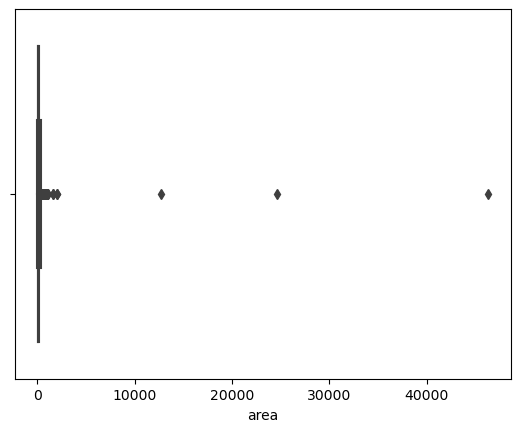

In [6]:
sns.boxplot(house_data['area'])
plt.show()

# Here the maximum value is 46335,minimum value is 11 and standard deviation is 537.The data is dispered(large variation in data)

In [7]:
house_data['area'].describe()

count    10692.000000
mean       149.217920
std        537.016942
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max      46335.000000
Name: area, dtype: float64

# From first graph we can't see the box plot clearly so we can filter the records for better visualization from second graph it is clearly visible as compared with first graph

# I created the new dataset with area less than 1000

In [8]:
house_data1=house_data[house_data.area<=1000]
house_data1

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


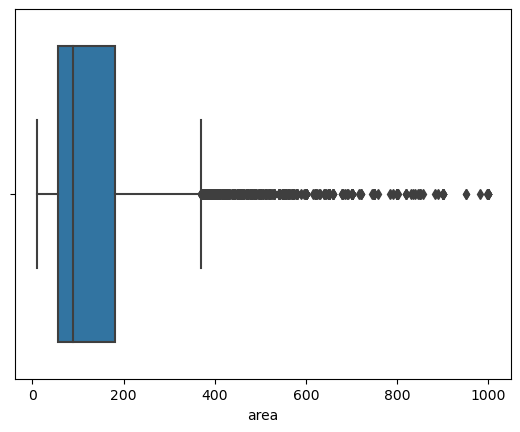

In [9]:
sns.boxplot(house_data1['area'])
plt.show()

# In above graph i got standarad deviation is 537 and after filtering data now i got 129.The data is less dipsered.

In [10]:
house_data1['area'].describe()

count    10683.000000
mean       140.638865
std        129.829151
min         11.000000
25%         56.000000
50%         90.000000
75%        181.500000
max       1000.000000
Name: area, dtype: float64

In [11]:
(house_data['floor']>84).sum()

1

In [12]:
house_data1.rename(columns={'floor': 'floors'},inplace=True) # rename the column of floor because it is a function in python
house_data1

,city,area,rooms,bathroom,parking spaces,floors,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [13]:
house_data1.rename(columns={'parking spaces': 'parking_spaces'},inplace=True) # rename the column of floor because it is a function in python
house_data1

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [14]:
house_data2=house_data1.query('floors<84')
house_data2

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


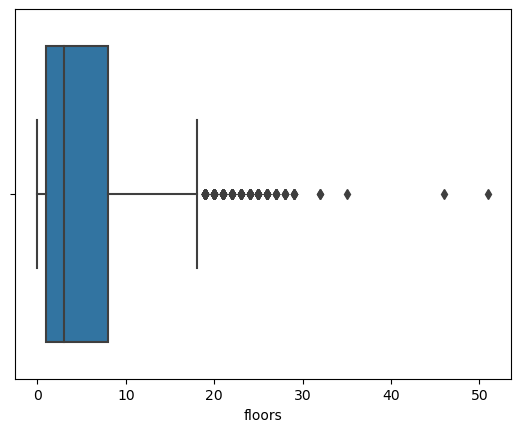

In [15]:
sns.boxplot(house_data2['floors']);

# Right skewed data ,a closer concentration of data at left side.

In [16]:
house_data2.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10682.0,140.644542,129.833903,11.0,56.00,90.0,181.75,1000.0
rooms,10682.0,2.504587,1.170442,1.0,2.00,2.0,3.00,13.0
bathroom,10682.0,2.234975,1.405322,1.0,1.00,2.0,3.00,10.0
parking_spaces,10682.0,1.605973,1.583211,0.0,0.00,1.0,2.00,10.0
floors,10682.0,5.041940,5.352277,0.0,1.00,3.0,8.00,51.0
hoa (R$),10682.0,1174.122355,15599.561226,0.0,170.00,560.0,1236.75,1117000.0
rent amount (R$),10682.0,3893.737034,3407.669795,450.0,1529.25,2650.0,5000.00,45000.0
property tax (R$),10682.0,365.301442,3108.040362,0.0,38.00,125.0,375.00,313700.0
fire insurance (R$),10682.0,53.261000,47.748552,3.0,21.00,36.0,68.00,677.0
total (R$),10682.0,5486.634151,16491.139444,499.0,2060.25,3578.5,6760.25,1120000.0


In [17]:
house_data2.city

0             São Paulo
1             São Paulo
2          Porto Alegre
3          Porto Alegre
4             São Paulo
              ...      
10687      Porto Alegre
10688         São Paulo
10689    Rio de Janeiro
10690    Rio de Janeiro
10691         São Paulo
Name: city, Length: 10682, dtype: object

## Univariant analysis

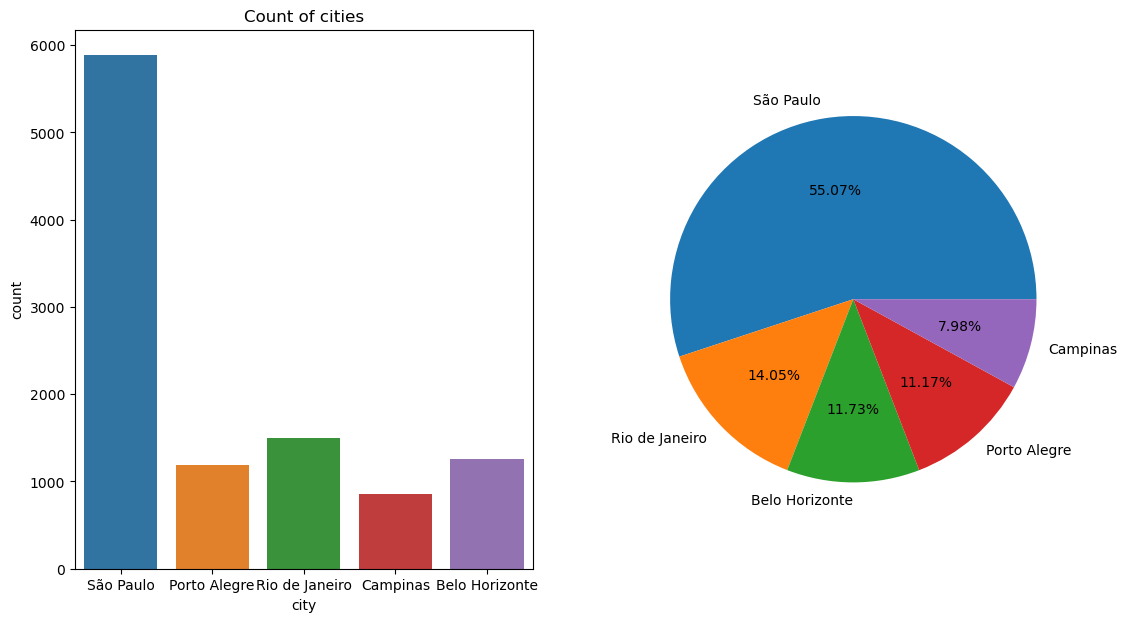

In [18]:
fig, ax=plt.subplots(1,2, figsize=(13,7))
ax[0].set_title("Count of cities")
percentage=house_data2["city"].value_counts()
labels=list(house_data2["city"].value_counts().index)

sns.countplot(x=house_data2["city"], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%0.2f%%")

plt.show()

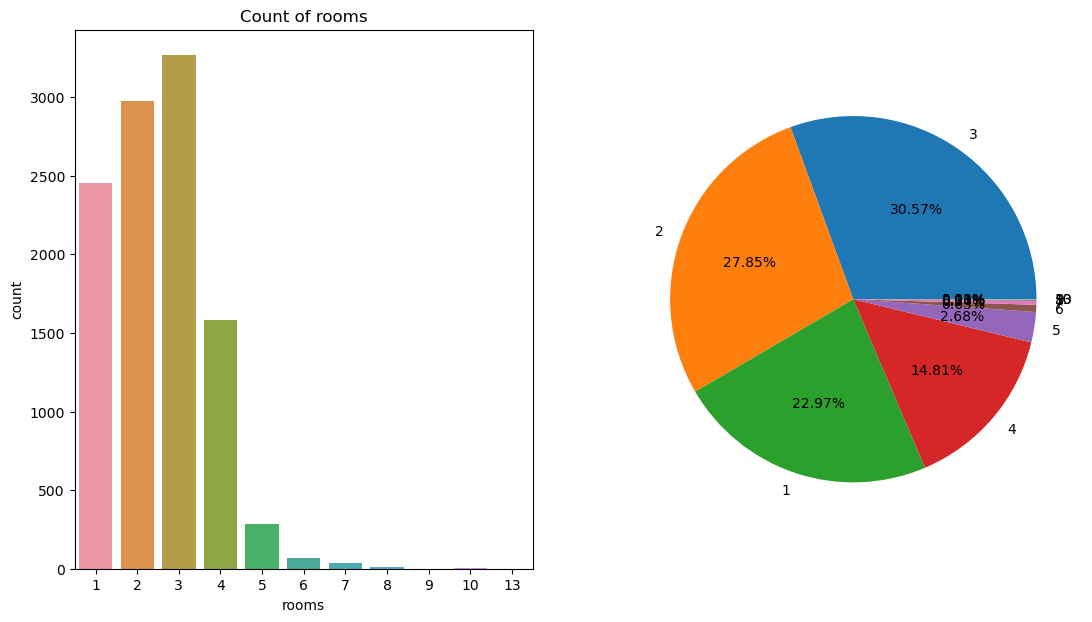

In [19]:
fig, ax=plt.subplots(1,2, figsize=(13,7))
ax[0].set_title("Count of rooms")
percentage=house_data2["rooms"].value_counts()
labels=list(house_data2["rooms"].value_counts().index)

sns.countplot(x=house_data2["rooms"], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%0.2f%%")

plt.show()

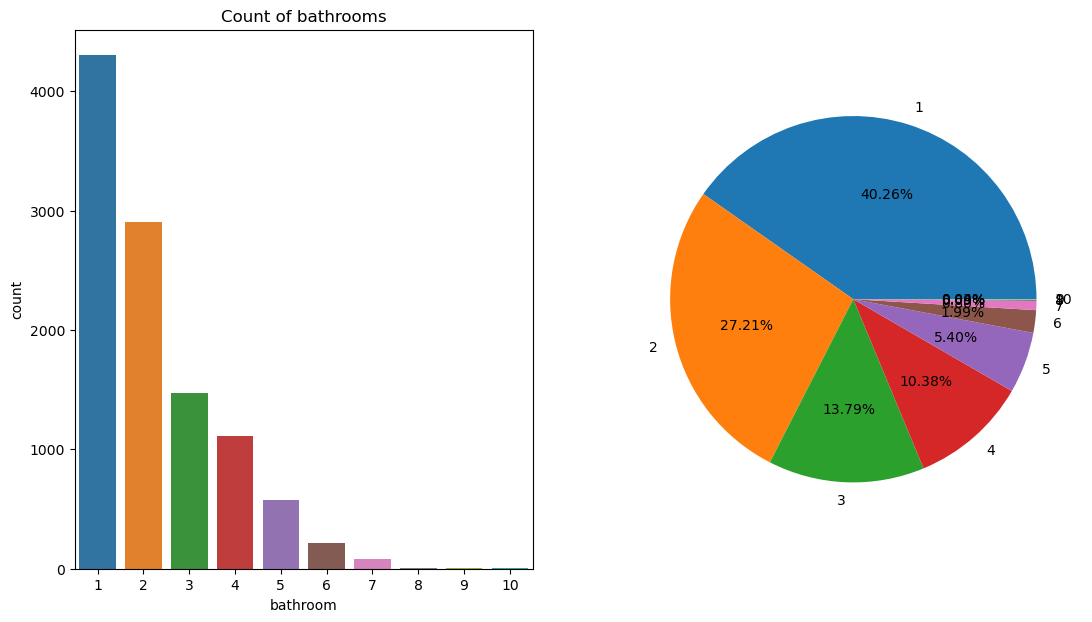

In [20]:
fig, ax=plt.subplots(1,2, figsize=(13,7))
ax[0].set_title("Count of bathrooms")
percentage=house_data2["bathroom"].value_counts()
labels=list(house_data2["bathroom"].value_counts().index)

sns.countplot(x=house_data2["bathroom"], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%0.2f%%")

plt.show()

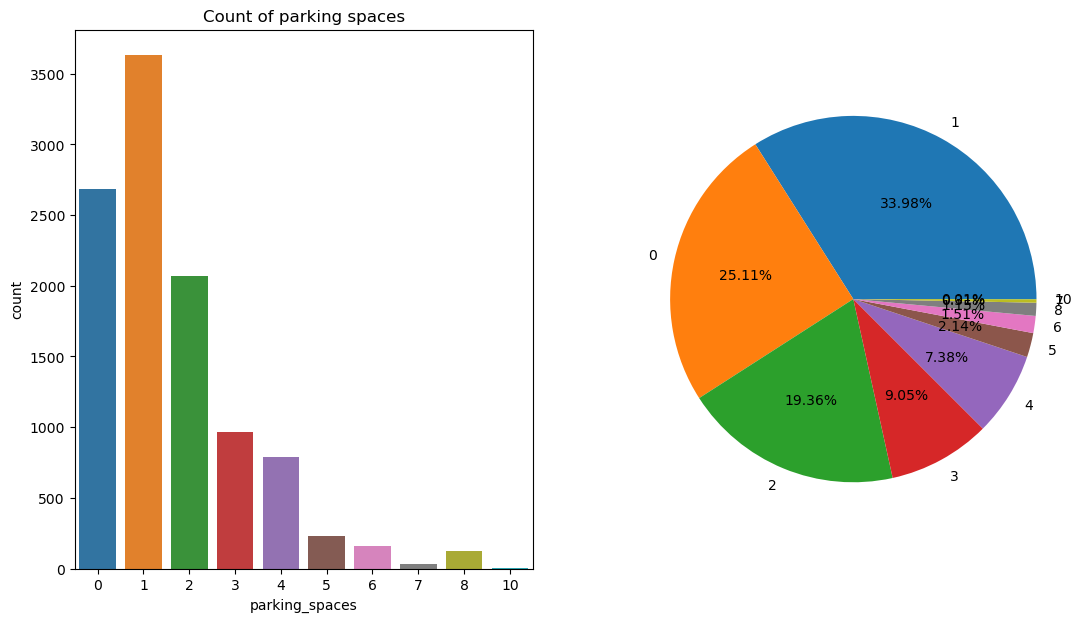

In [21]:
fig, ax=plt.subplots(1,2, figsize=(13,7))
ax[0].set_title("Count of parking spaces")
percentage=house_data2["parking_spaces"].value_counts()
labels=list(house_data2["parking_spaces"].value_counts().index)

sns.countplot(x=house_data2["parking_spaces"], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%0.2f%%")

plt.show()

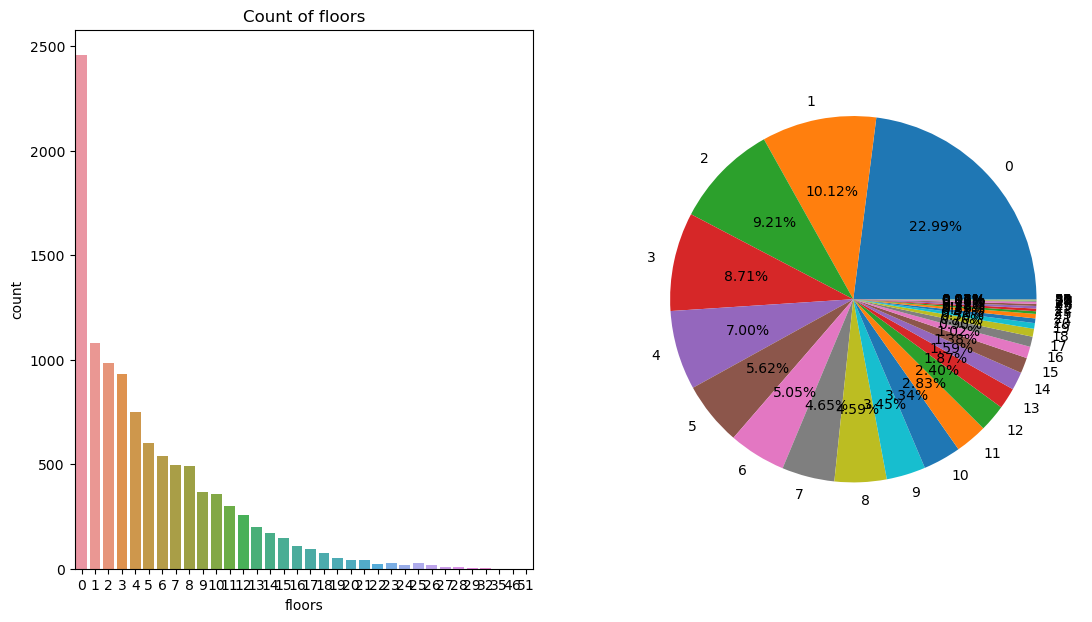

In [22]:
fig, ax=plt.subplots(1,2, figsize=(13,7))
ax[0].set_title("Count of floors")
percentage=house_data2["floors"].value_counts()
labels=list(house_data2["floors"].value_counts().index)

sns.countplot(x=house_data2["floors"], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%0.2f%%")

plt.show()

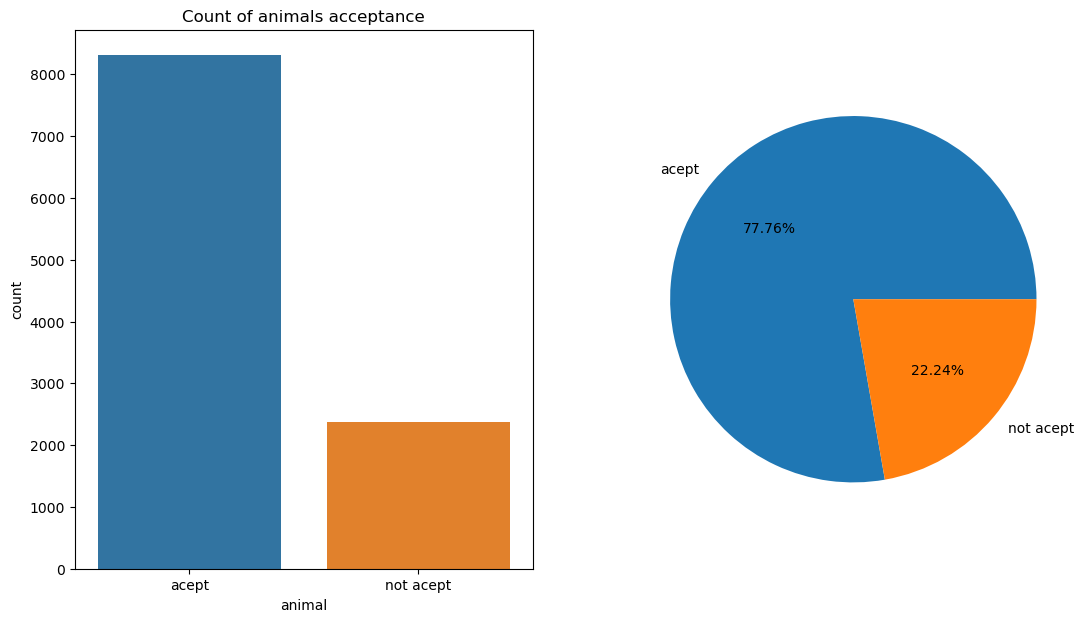

In [23]:
fig, ax=plt.subplots(1,2, figsize=(13,7))
ax[0].set_title("Count of animals acceptance")
percentage=house_data2["animal"].value_counts()
labels=list(house_data2["animal"].value_counts().index)

sns.countplot(x=house_data2["animal"], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%0.2f%%")

plt.show()

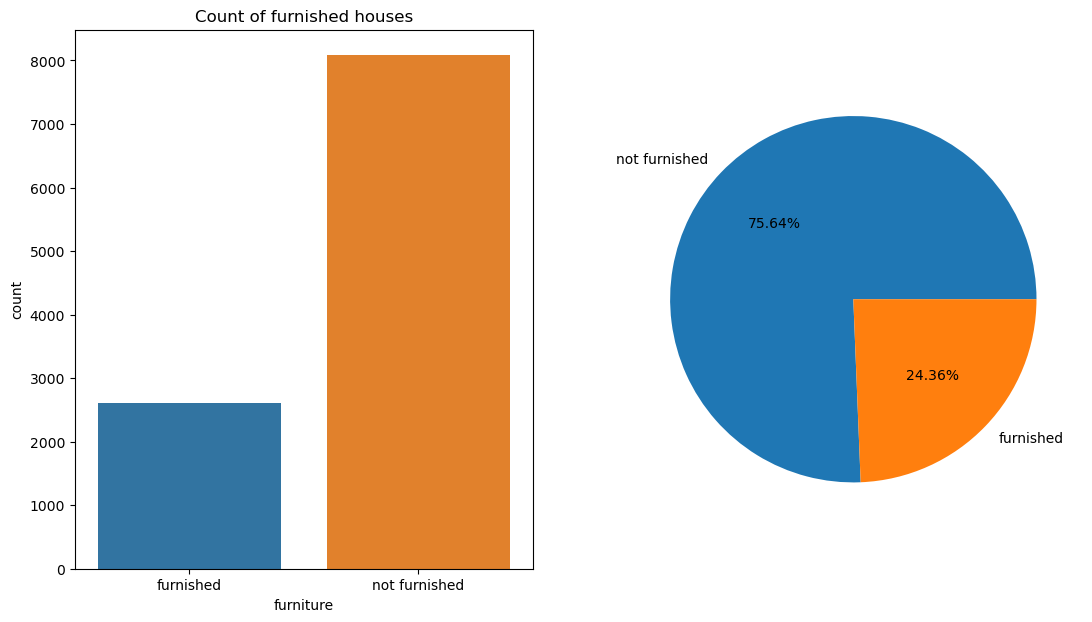

In [24]:
fig, ax=plt.subplots(1,2, figsize=(13,7))
ax[0].set_title("Count of furnished houses")
percentage=house_data2["furniture"].value_counts()
labels=list(house_data2["furniture"].value_counts().index)

sns.countplot(x=house_data2["furniture"], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%0.2f%%")

plt.show()

# Bivariant

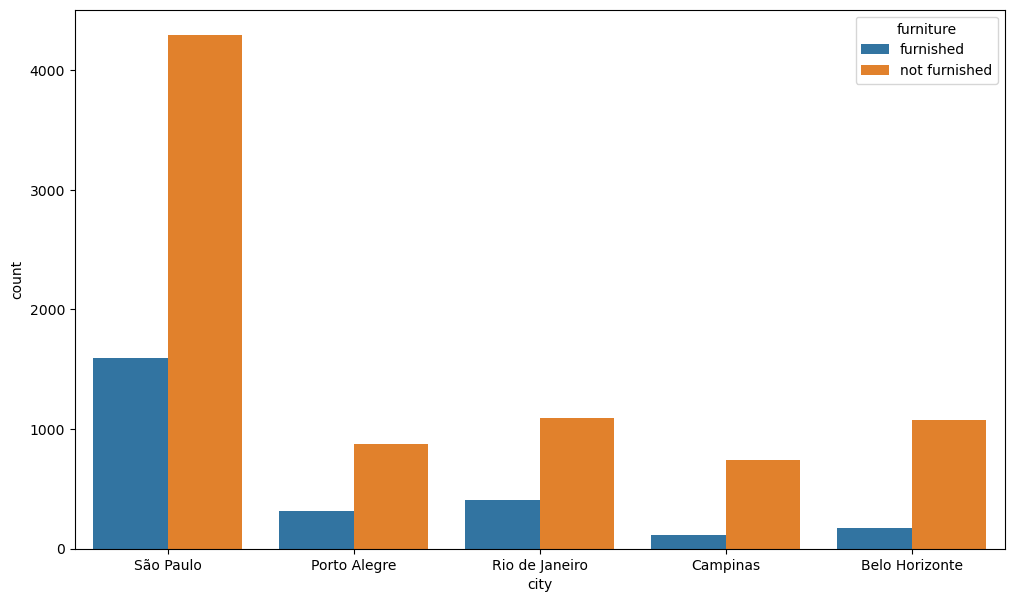

In [25]:
fig, ax=plt.subplots(figsize=(12,7))
sns.countplot(x="city", hue="furniture", data=house_data2);

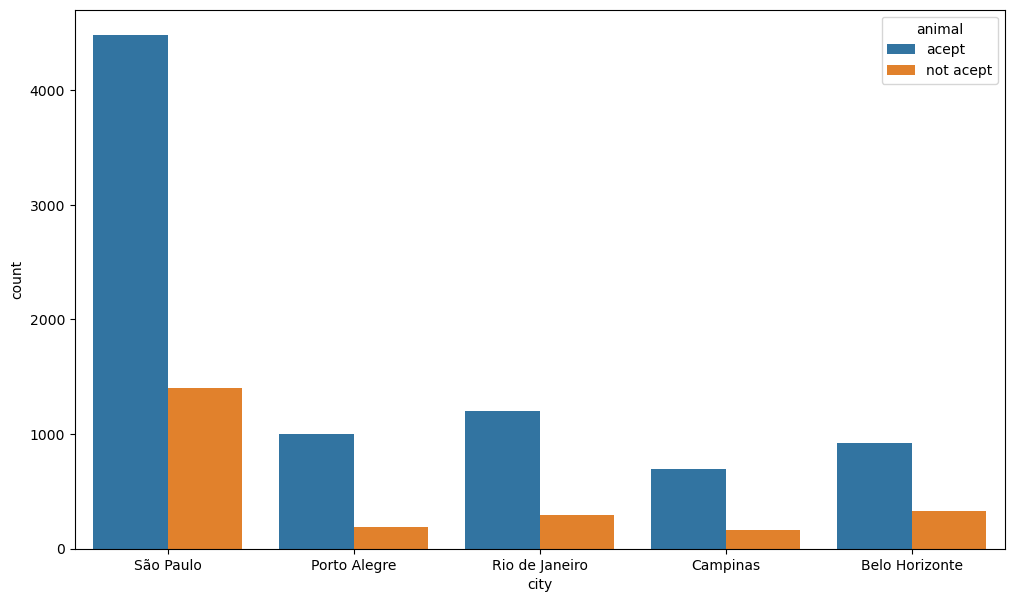

In [26]:
fig, ax=plt.subplots(figsize=(12,7))
sns.countplot(x="city", hue="animal", data=house_data2);

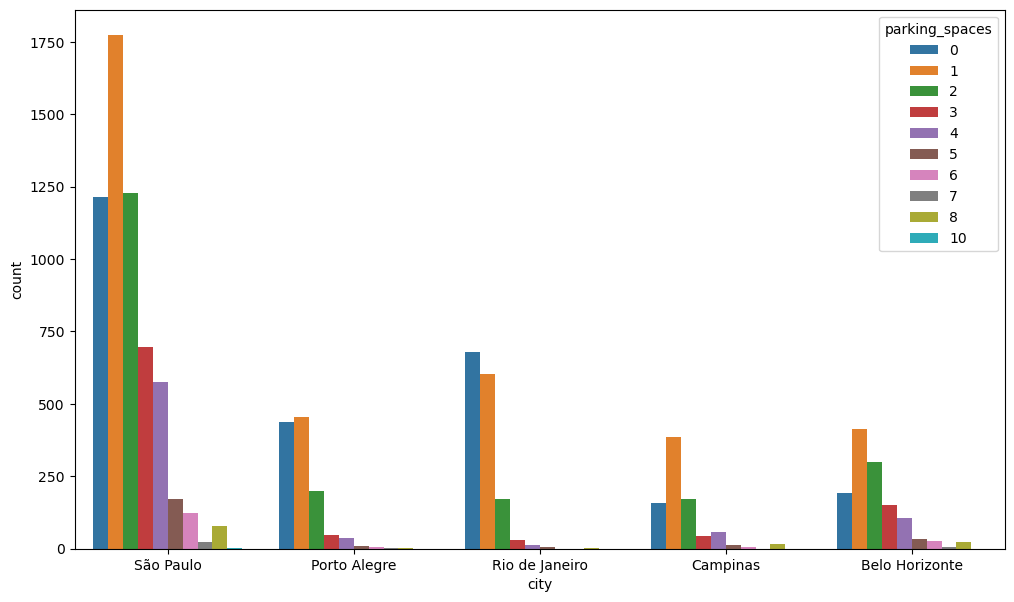

In [27]:
fig, ax=plt.subplots(figsize=(12,7))
sns.countplot(x="city", hue="parking_spaces", data=house_data2);

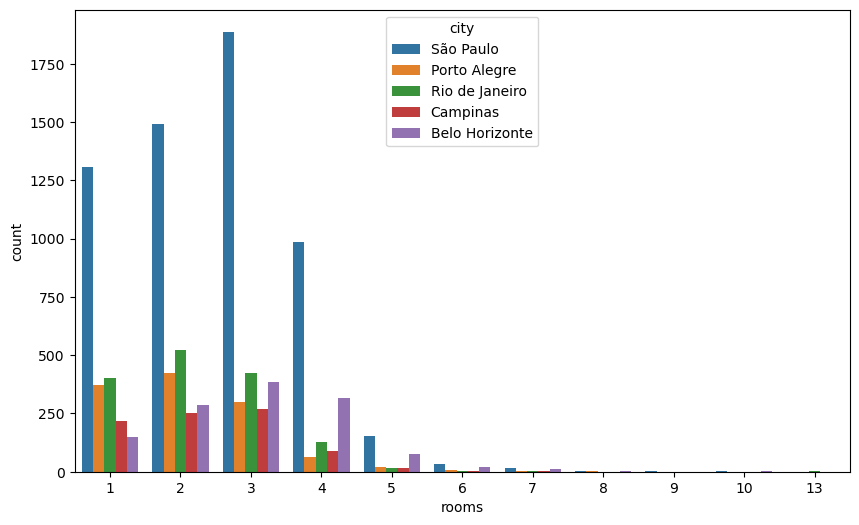

In [28]:
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(x="rooms", hue="city", data=house_data2);

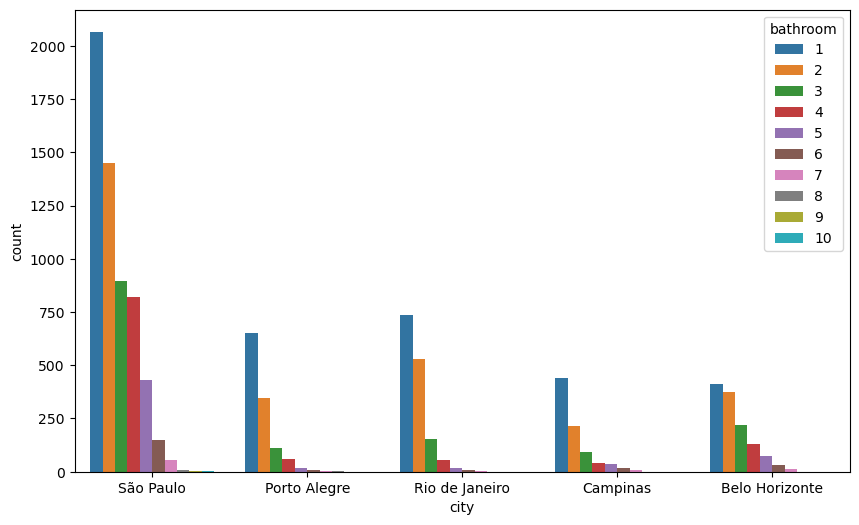

In [29]:
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(x="city", hue="bathroom", data=house_data2);

# Multivariant

In [30]:
house_data2.rename(columns={'parking spaces':'parking_spaces'}, inplace=True)
house_data2

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [31]:
house_data2.rename(columns={'hoa (R$)':'hoa'}, inplace=True)
house_data2

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


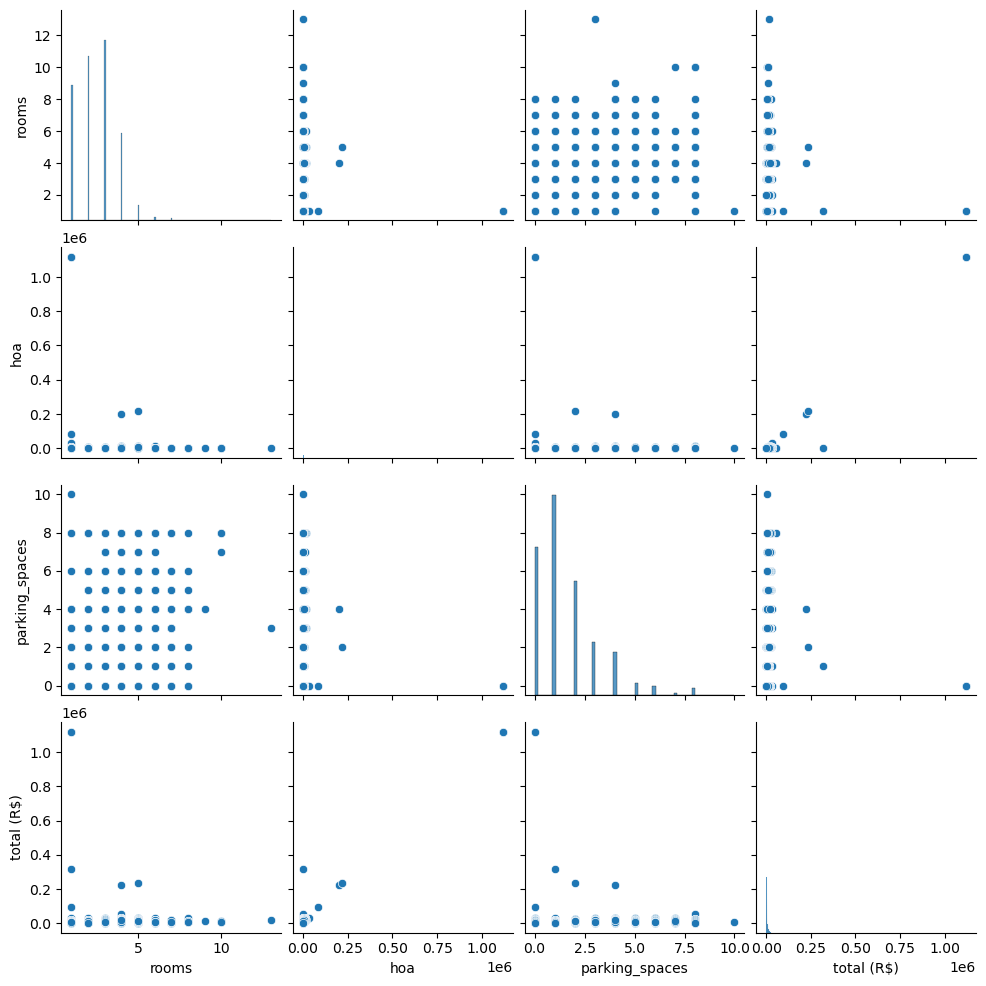

In [32]:
sns.pairplot(data=house_data2[['rooms', 'hoa', 'parking_spaces', 'total (R$)']], palette='viridis');

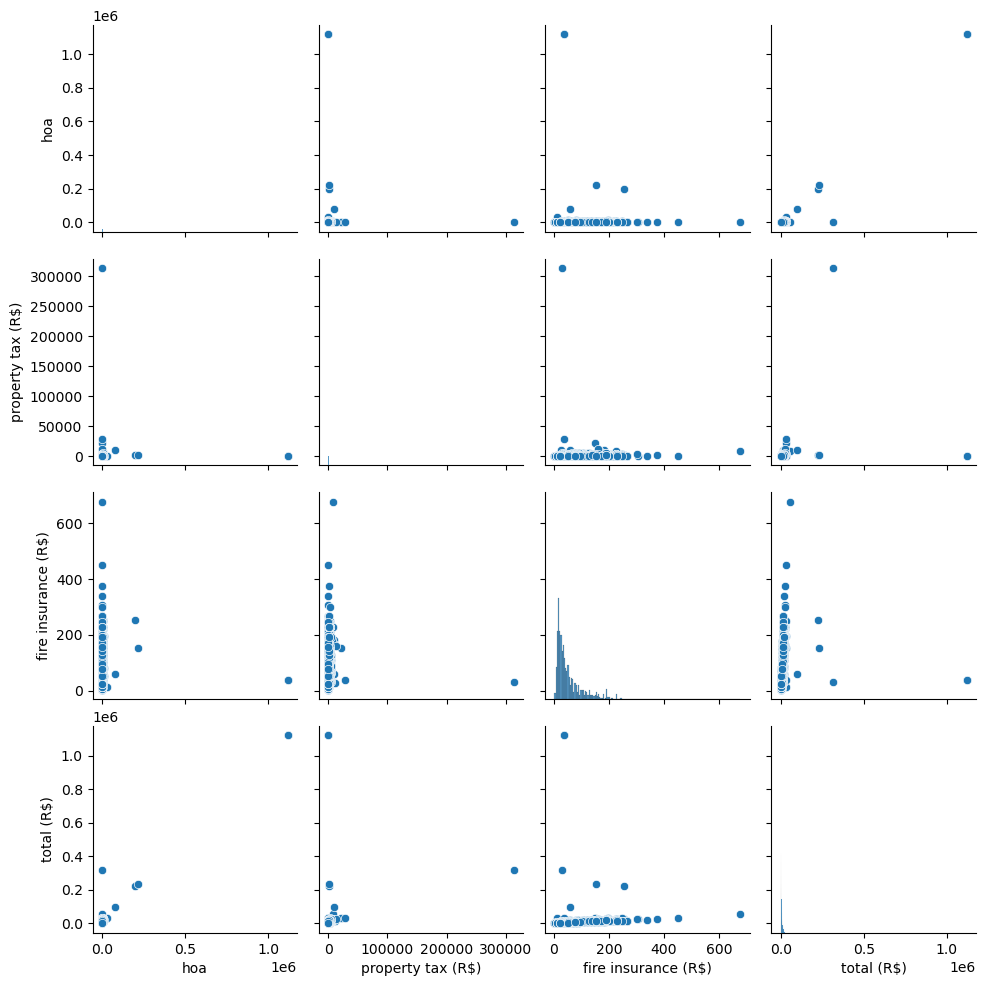

In [33]:
sns.pairplot(data=house_data2[['hoa', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']], palette='viridis');

# Filtering cities
In question they have already mentioned that Roe De Janerio  and Soa Paulo most expensive cities so i filter the data by excluding that cities.

In [34]:
filter_cities=house_data2[(house_data2.city=='Porto Alegre')|(house_data2.city=='Campinas')|(house_data2.city=='Belo Horizonte')]
filter_cities

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419


# for Bachelors 
I am assuming area is lessthan are equal to 110,rooms=1,bathroom=1,parking spaces less than are equal to 2,animal accepted and furnitures are furnished.

In [35]:
bachelor=filter_cities[(filter_cities.area<=110)&(filter_cities.rooms==1)&(filter_cities.bathroom==1)&(filter_cities.parking_spaces<=2)&(filter_cities.animal=='acept')&(filter_cities.furniture=='furnished')]
bachelor

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
39,Porto Alegre,40,1,1,1,6,acept,furnished,390,2990,0,44,3424
47,Porto Alegre,42,1,1,2,2,acept,furnished,190,1770,17,26,2003
49,Campinas,48,1,1,1,2,acept,furnished,505,1600,59,21,2185
136,Campinas,44,1,1,0,3,acept,furnished,350,916,12,12,1290
165,Porto Alegre,44,1,1,1,2,acept,furnished,250,1500,17,22,1789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,Porto Alegre,37,1,1,0,6,acept,furnished,430,2220,84,33,2767
10486,Campinas,55,1,1,1,9,acept,furnished,660,2600,73,33,3366
10551,Campinas,52,1,1,1,3,acept,furnished,730,3000,59,39,3828
10569,Belo Horizonte,20,1,1,1,0,acept,furnished,0,1100,0,15,1115


In [36]:
bachelor.describe().T

,count,mean,std,min,25%,50%,75%,max
area,96.0,44.177083,11.265219,18.0,40.00,43.5,50.0,70.0
rooms,96.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
bathroom,96.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
parking_spaces,96.0,0.583333,0.574304,0.0,0.00,1.0,1.0,2.0
floors,96.0,4.510417,4.511960,0.0,2.00,3.0,6.0,21.0
hoa,96.0,408.625000,332.598612,0.0,207.50,318.0,535.0,1580.0
rent amount (R$),96.0,1523.739583,749.772867,550.0,1083.00,1294.0,1825.0,5000.0
property tax (R$),96.0,41.364583,39.108787,0.0,11.00,30.0,63.5,151.0
fire insurance (R$),96.0,21.697917,10.117332,7.0,15.00,19.0,25.0,64.0
total (R$),96.0,1995.427083,977.987103,831.0,1284.75,1738.5,2368.5,6026.0


In [37]:
bachelor.groupby('city')['total (R$)'].mean().sort_values(ascending=False)

city
Campinas          2594.875000
Porto Alegre      1827.953125
Belo Horizonte    1536.875000
Name: total (R$), dtype: float64

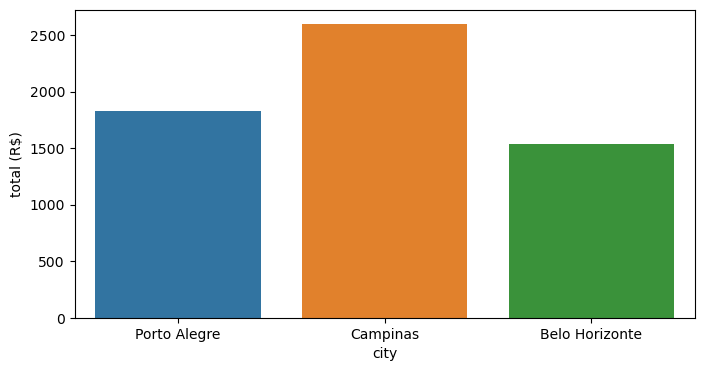

In [38]:
plt.figure(figsize=(8,4))
sns.barplot(x= bachelor['city'], y= bachelor['total (R$)'],ci= False);

# By analysing above graph Porto Alegre and Belo Horizonte are the cities are best for bachelors with furnished house and accepting animals.

# Bachelors 
without accepting animals and furniture are not well furnished.

In [39]:
bachelor_without=filter_cities[(filter_cities.area<=110)&(filter_cities.rooms==1)&(filter_cities.bathroom==1)&(filter_cities.parking_spaces<=2)&(filter_cities.hoa==0)&(filter_cities.animal=='not acept')&(filter_cities.furniture=='not furnished')]
bachelor_without

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
291,Belo Horizonte,40,1,1,0,0,not acept,not furnished,0,900,0,15,915
1757,Belo Horizonte,27,1,1,0,2,not acept,not furnished,0,1167,334,16,1517
1772,Campinas,54,1,1,1,6,not acept,not furnished,0,1370,31,18,1419
1847,Belo Horizonte,30,1,1,0,2,not acept,not furnished,0,550,0,8,558
1990,Porto Alegre,24,1,1,1,0,not acept,not furnished,0,550,0,9,559
2093,Belo Horizonte,40,1,1,0,0,not acept,not furnished,0,650,59,11,720
2121,Porto Alegre,25,1,1,0,0,not acept,not furnished,0,550,0,9,559
2386,Belo Horizonte,25,1,1,1,1,not acept,not furnished,0,550,84,8,642
2578,Belo Horizonte,55,1,1,0,0,not acept,not furnished,0,1020,21,17,1058
3839,Belo Horizonte,25,1,1,0,2,not acept,not furnished,0,650,0,9,659


In [40]:
bachelor_without.describe().T

,count,mean,std,min,25%,50%,75%,max
area,36.0,32.583333,10.365809,16.0,25.0,30.0,40.00,55.0
rooms,36.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
bathroom,36.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
parking_spaces,36.0,0.277778,0.454257,0.0,0.0,0.0,1.00,1.0
floors,36.0,1.000000,1.218899,0.0,0.0,1.0,1.00,6.0
hoa,36.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
rent amount (R$),36.0,891.222222,307.048355,500.0,650.0,805.0,1167.00,1500.0
property tax (R$),36.0,34.805556,77.220582,0.0,0.0,0.0,38.25,334.0
fire insurance (R$),36.0,13.055556,4.140010,7.0,9.0,13.0,16.25,22.0
total (R$),36.0,939.083333,333.350984,509.0,659.0,844.5,1260.00,1520.0


In [41]:
bachelor_without.groupby('city')['total (R$)'].mean().sort_values(ascending=False)

city
Campinas          1192.333333
Belo Horizonte     959.965517
Porto Alegre       597.750000
Name: total (R$), dtype: float64

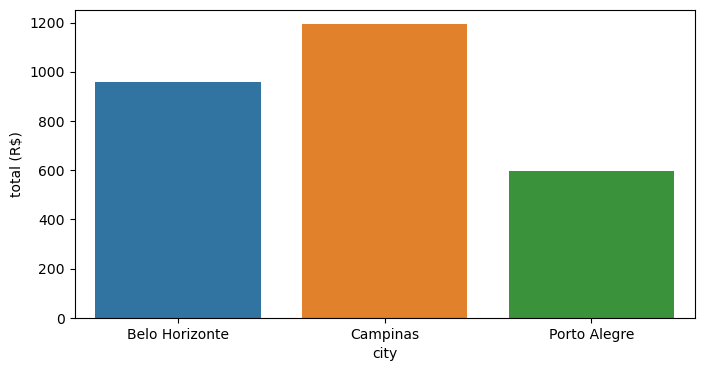

In [42]:
plt.figure(figsize=(8,4))
sns.barplot(x= bachelor_without['city'], y= bachelor_without['total (R$)'],ci= False);

# By analyzing above graph we can say that Belo Horizonte and Porto Alegre are the countries suitable for Bachelors without furnished and without accepting animals ,there is huge drop in price,while comparing with  above two parameters

# Now considering middle size family ,where area less than or equal to 250 and rooms = 3,bathroom = 2,parking spaces =2,animal are accepting,well furnished.

In [43]:
middle_size_family=filter_cities[(filter_cities.area<=250)&(filter_cities.rooms==3)&(filter_cities.bathroom==2)&(filter_cities.parking_spaces==2)&(filter_cities.animal=='acept')&(filter_cities.furniture=='furnished')]
middle_size_family[middle_size_family['area'].between(110,250)]

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
739,Porto Alegre,120,3,2,2,2,acept,furnished,700,2975,155,44,3874
1785,Porto Alegre,112,3,2,2,3,acept,furnished,800,4100,100,60,5060
2888,Porto Alegre,132,3,2,2,9,acept,furnished,1000,3350,167,49,4566
2926,Porto Alegre,148,3,2,2,3,acept,furnished,2200,3990,167,59,6416
3978,Porto Alegre,127,3,2,2,2,acept,furnished,600,2900,220,43,3763
5227,Porto Alegre,140,3,2,2,3,acept,furnished,1300,3200,167,47,4714
6225,Campinas,130,3,2,2,4,acept,furnished,1150,2800,184,36,4170
8121,Porto Alegre,179,3,2,2,0,acept,furnished,0,3700,67,66,3833
9792,Porto Alegre,125,3,2,2,3,acept,furnished,1000,7700,292,113,9105


In [44]:
middle_size_family.groupby('city')['total (R$)'].mean().sort_values(ascending=False)

city
Porto Alegre      4637.294118
Belo Horizonte    3467.333333
Campinas          3333.916667
Name: total (R$), dtype: float64

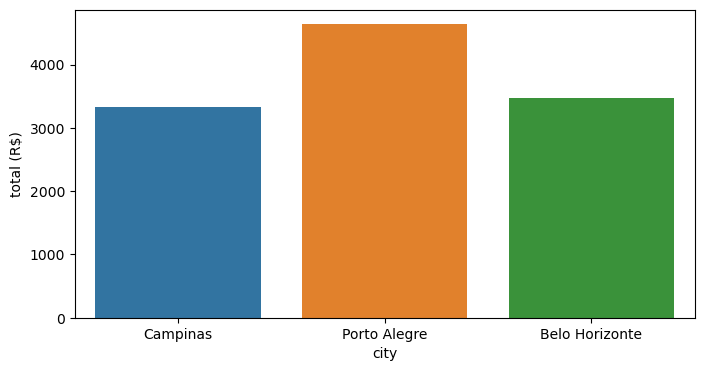

In [45]:
plt.figure(figsize=(8,4))
sns.barplot(x= middle_size_family['city'], y= middle_size_family['total (R$)'],ci= False);

# For middle size families with furnished house and accepting animals ,"Campinas" and "Belo Horizonte" cities are best relocation compared to other cities.

In [46]:
middle_size_family_without=filter_cities[(filter_cities.area<=250)&(filter_cities.rooms==3)&(filter_cities.bathroom==2)&(filter_cities.parking_spaces==2)&(filter_cities.animal=='not acept')&(filter_cities.furniture=='not furnished')]
middle_size_family_without

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
345,Belo Horizonte,105,3,2,2,2,not acept,not furnished,1681,3300,390,44,5415
783,Belo Horizonte,90,3,2,2,2,not acept,not furnished,530,2000,159,27,2716
2254,Porto Alegre,98,3,2,2,4,not acept,not furnished,700,2550,100,38,3388
2625,Belo Horizonte,95,3,2,2,4,not acept,not furnished,666,1800,134,24,2624
3165,Belo Horizonte,85,3,2,2,2,not acept,not furnished,500,1500,114,20,2134
3178,Belo Horizonte,63,3,2,2,2,not acept,not furnished,180,1300,90,18,1588
3212,Campinas,110,3,2,2,7,not acept,not furnished,900,2100,100,27,3127
3241,Belo Horizonte,106,3,2,2,7,not acept,not furnished,1294,2200,239,30,3763
3364,Campinas,80,3,2,2,14,not acept,not furnished,704,1800,83,23,2610
3567,Belo Horizonte,120,3,2,2,4,not acept,not furnished,350,1500,81,20,1951


In [47]:
middle_size_family_without.groupby('city')['total (R$)'].mean().sort_values(ascending=False)

city
Porto Alegre      3425.666667
Belo Horizonte    2791.285714
Campinas          2693.400000
Name: total (R$), dtype: float64

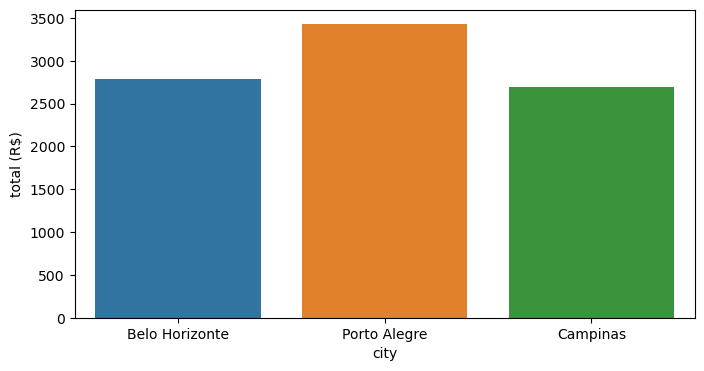

In [48]:
plt.figure(figsize=(8,4))
sns.barplot(x= middle_size_family_without['city'], y= middle_size_family_without['total (R$)'],ci= False);

# For middle size families without furnished house and not accepting animals ,"Campinas" and "Belo Horizonte" cities are best relocation compared to other cities.

# Big Family area is greater than or equal to 300 ,bathroom,rooms,parking_spaces are greater than or equal to 3,animals accepting  and furnished houses

In [49]:
big_family=filter_cities[(filter_cities.area>=300)&(filter_cities.bathroom>=3)&(filter_cities.rooms>=3)&(filter_cities. parking_spaces>=3)&(filter_cities.animal=='acept')&(filter_cities.furniture=='furnished')]
big_family

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
91,Porto Alegre,350,4,4,4,0,acept,furnished,1,9000,359,160,9520
241,Belo Horizonte,570,5,6,7,0,acept,furnished,0,8330,873,137,9340
490,Porto Alegre,360,3,4,3,5,acept,furnished,4000,13200,500,193,17890
538,Belo Horizonte,428,5,5,4,0,acept,furnished,0,9600,667,158,10430
726,Belo Horizonte,325,5,4,7,0,acept,furnished,0,8900,417,146,9463
753,Belo Horizonte,600,5,6,8,0,acept,furnished,0,10500,642,173,11320
915,Porto Alegre,600,5,4,5,0,acept,furnished,0,12000,1167,214,13380
1041,Belo Horizonte,800,7,7,4,0,acept,furnished,0,8900,943,146,9989
1255,Porto Alegre,450,5,4,4,0,acept,furnished,0,9000,250,160,9410


In [50]:
big_family.groupby('city')['total (R$)'].mean().sort_values(ascending=False)

city
Belo Horizonte    11584.800000
Campinas          10295.400000
Porto Alegre       9822.066667
Name: total (R$), dtype: float64

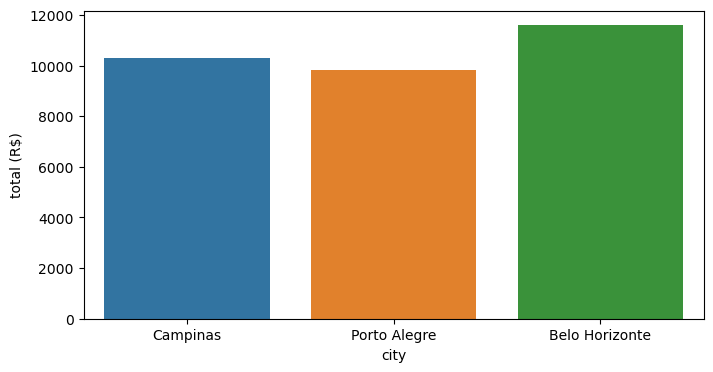

In [51]:
plt.figure(figsize=(8,4))
sns.barplot(x= big_family['city'], y= big_family['total (R$)'],ci= False);

# For big family with furished house accepting animals Campinas and Porto Alegre City are the best.

In [52]:
big_family_without=filter_cities[(filter_cities.area>=300)&(filter_cities.bathroom>=3)&(filter_cities.rooms>=3)&(filter_cities.parking_spaces>=3)&(filter_cities.hoa==0)&(filter_cities.animal=='not acept')&(filter_cities.furniture=='not furnished')]
big_family_without

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
564,Belo Horizonte,300,5,5,5,0,not acept,not furnished,0,4500,450,74,5024
626,Campinas,750,4,5,5,0,not acept,not furnished,0,10400,667,157,11220
1200,Porto Alegre,360,4,4,4,0,not acept,not furnished,0,2820,321,51,3192
1285,Porto Alegre,350,3,4,4,0,not acept,not furnished,0,3500,167,63,3730
1297,Belo Horizonte,497,5,5,4,0,not acept,not furnished,0,8000,720,132,8852
2086,Belo Horizonte,320,5,4,6,0,not acept,not furnished,0,8000,584,132,8716
2548,Belo Horizonte,384,5,4,6,0,not acept,not furnished,0,5000,435,82,5517
2647,Belo Horizonte,580,5,6,5,0,not acept,not furnished,0,15000,1153,246,16400
3511,Belo Horizonte,450,7,5,3,0,not acept,not furnished,0,7880,292,130,8302
5916,Belo Horizonte,344,4,4,3,0,not acept,not furnished,0,3500,121,58,3679


In [53]:
big_family_without.groupby('city')['total (R$)'].mean().sort_values(ascending=False)

city
Belo Horizonte    8557.000000
Campinas          6709.666667
Porto Alegre      3461.000000
Name: total (R$), dtype: float64

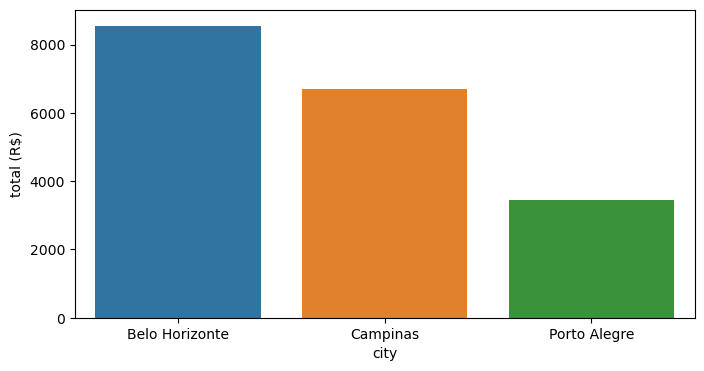

In [54]:
plt.figure(figsize=(8,4))
sns.barplot(x= big_family_without['city'], y= big_family_without['total (R$)'],ci= False);

# For big family without furished house ,not accepting animals and without hoa ,Campinas and Porto Alegre City are the best.

In [55]:
house_data2.groupby('city')['total (R$)'].mean().sort_values(ascending=False)

city
São Paulo         6375.126296
Belo Horizonte    6312.865124
Rio de Janeiro    4611.684877
Campinas          3174.164319
Porto Alegre      2989.782900
Name: total (R$), dtype: float64

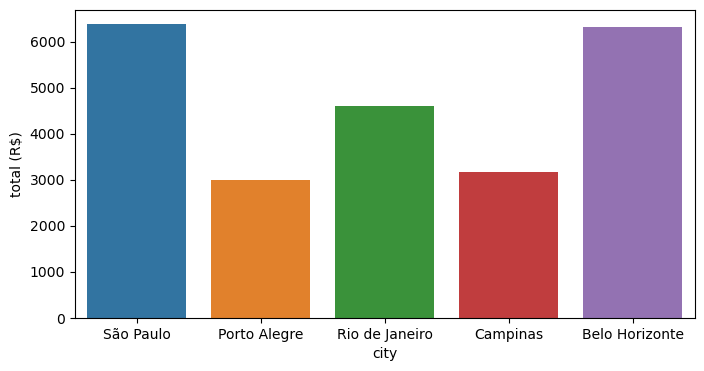

In [56]:
fig, ax=plt.subplots(figsize=(8,4))
sns.barplot(x=house_data2['city'], y=house_data2['total (R$)'], ci=False);

# By analysing above graphs "Porto Alegre" and "Campinas" are the cities that we can relocate.

In [57]:
city_wise_animals=house_data2.groupby('animal')['total (R$)']
display(city_wise_animals.agg(['mean', 'median']))

,mean,median
animal,,
acept,5422.520708,3699.5
not acept,5710.761364,3217.5


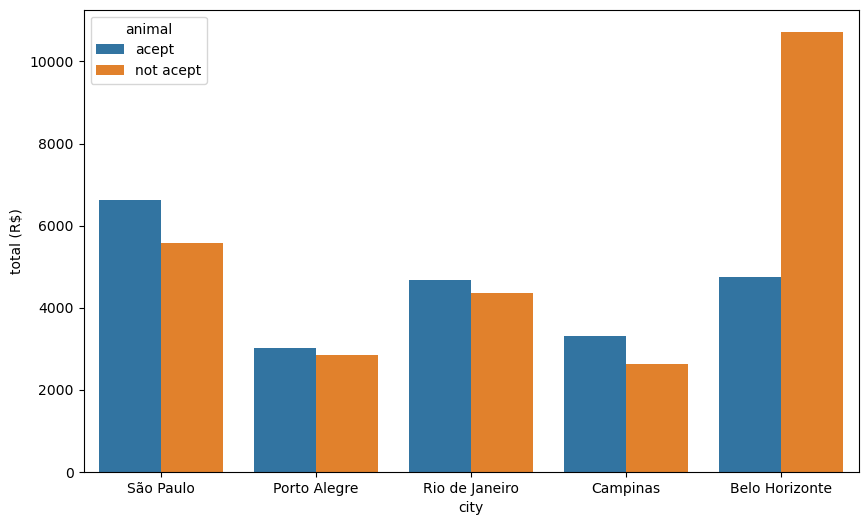

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x=house_data2['city'], y=house_data2['total (R$)'], hue=house_data2['animal'], ci=False);

# Analysing by city wise we can say that porto alegre and campinas are the cities that allows animals at low cost compared to remaining cities.¶

In [59]:
house_data2.groupby('city')['hoa'].mean().sort_values(ascending=False)

city
Belo Horizonte    2329.712690
São Paulo         1169.530002
Rio de Janeiro    1079.432378
Campinas           628.839202
Porto Alegre       491.618609
Name: hoa, dtype: float64

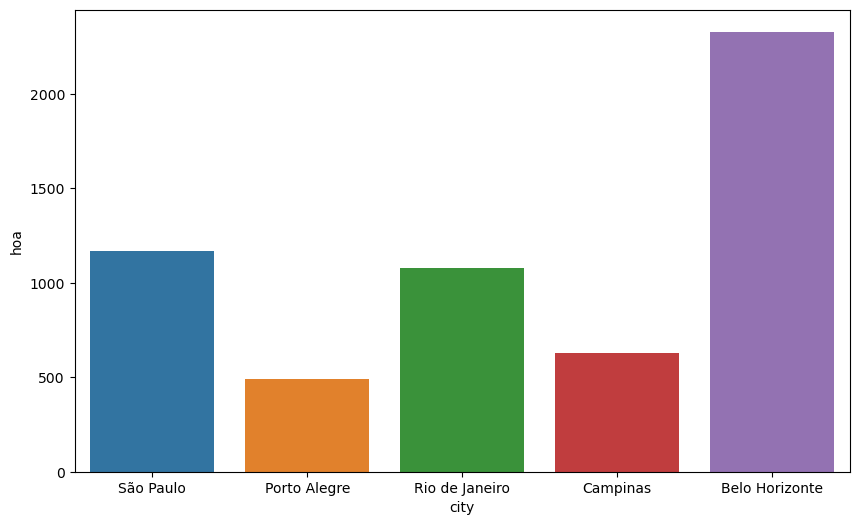

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x=house_data2['city'], y=house_data2['hoa'], ci=False);

# Houses with lowest HOA is porto alegre and campinas when compared with remaining cities.

 # Furnished houses have higher rent value

In [61]:
house_data2.groupby('furniture')['total (R$)'].mean().sort_values(ascending=False)

furniture
furnished        6584.060723
not furnished    5133.230198
Name: total (R$), dtype: float64

<Figure size 1000x600 with 0 Axes>

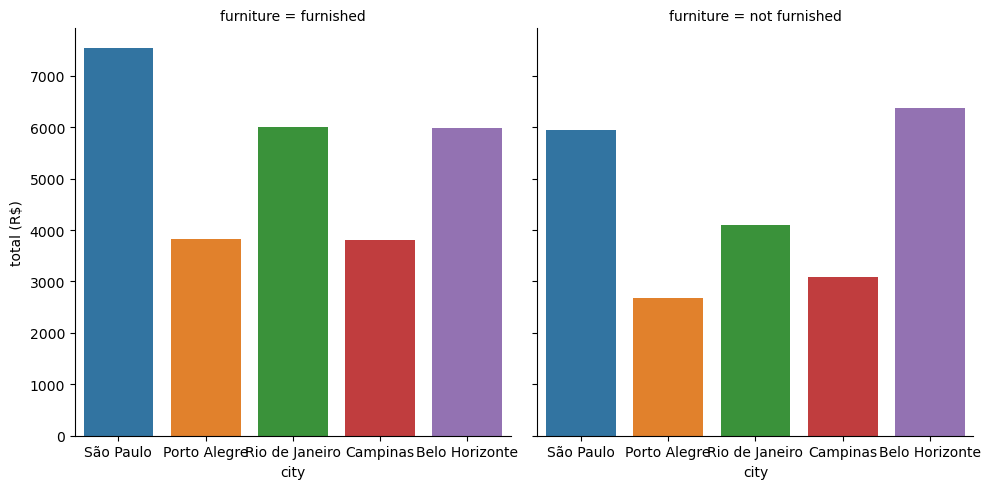

In [62]:
plt.figure(figsize=(10,6))
sns.catplot(x='city', y='total (R$)', col='furniture', kind='bar', ci=False, data=house_data2);

 # Cities with furnished increase the total cost and two cities porto alegre and campinas are the cities where furnished houses are less compared with remaining citi

# Parking spaces

In [63]:
house_data2.groupby('parking_spaces')['total (R$)'].mean().sort_values(ascending=False)

parking_spaces
7     12043.333333
6     11506.447205
5     11325.484716
4     11010.196701
8     10423.447154
3      8783.166494
2      6070.200677
10     3993.000000
0      3614.330350
1      3598.479063
Name: total (R$), dtype: float64

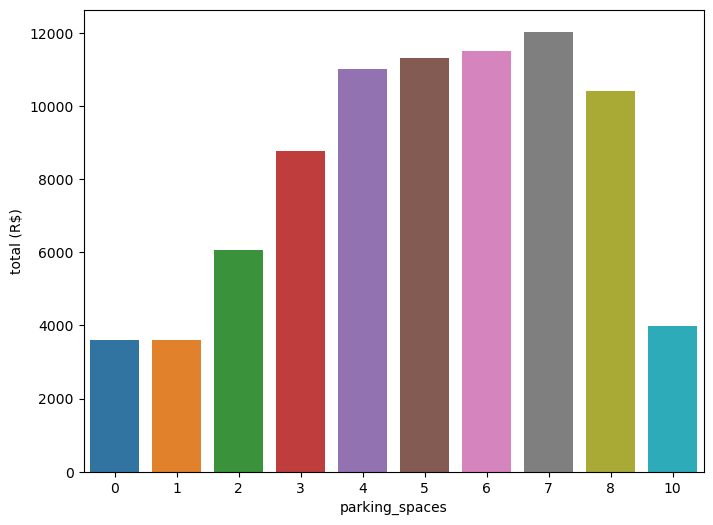

In [64]:
plt.figure(figsize=(8,6))
sns.barplot(x=house_data2['parking_spaces'], y=house_data2['total (R$)'], ci=False);

#  Parking spaces also increases the total cost if there are more parking spaces if parking spaces increases from 0 to 7 from 7 to 10 it again decreases and parking spaces with 8 is lower than 7 whereas with 10 parking spaces lower than 2 parking spaces.

# CONCLUSION :

By Analysing above graphs "Belo Horizonte" and "Porto Alegre"are the cities better for bachelors with furnished house and as well as animals accepted.


# By analysing above graph we can say that Porto Alegre and Belo Horizonte are the cities best for bachelors without furnished and also animals not allowed also no condominium fee and there is huge drop in price when removing these parameters.

# By analysing above graph for middle size families with furnished house and accepting animals "Campinas" and "Belo Horizonte" cities are best for relocation when compared with remaining cities.

# By analysing above graph for middle size families without furinshed house and also not accepting animals with these parameters "Belo horizonto" and "Campinas" cities are better for living without these parameters there is more difference in the total price.

# For Big families "Porto Alegre" and "Campinas" are the cities better for living with furnished houses and as well as animals allowed.

# For Big size families without furnished houses and also animals not accepted and also without condominium fee without these parameters we can say that "Porto Alegre" and "Campinas" city are better for living.

# From above we can say that below factors having high impact on prices

# Having animals, HOA, Furnished houses, Number of parking spaces are having high impact on total price who doesnt need these parameters can we have drop in price.